In [1]:
from models.tf_idf import TFIDFClassifier
from data_loader import AnnotationDataLoader

In [2]:
tfidf = TFIDFClassifier()
dataloader = AnnotationDataLoader()

tfidf.fit(dataloader.get_train())

In [3]:
tfidf.save_to_file("models/tf_idf/LogisticRegression_TF-IDF.pkl")

In [4]:
new = TFIDFClassifier.load_from_file("models/tf_idf/LogisticRegression_TF-IDF.pkl")

In [5]:
dataloader = AnnotationDataLoader()
df = dataloader.get_test()
df["protein_annotation"]
print(new.predict(df["protein_annotation"], probabilities=True))

[[3.69553895e-03 9.92440674e-04 9.95312020e-01]
 [9.98538652e-03 1.53383188e-02 9.74676295e-01]
 [7.41517260e-01 1.57017018e-01 1.01465722e-01]
 ...
 [1.13613565e-02 1.57928877e-03 9.87059355e-01]
 [1.43648163e-02 5.82301094e-02 9.27405074e-01]
 [8.42786463e-04 7.58129568e-03 9.91575918e-01]]



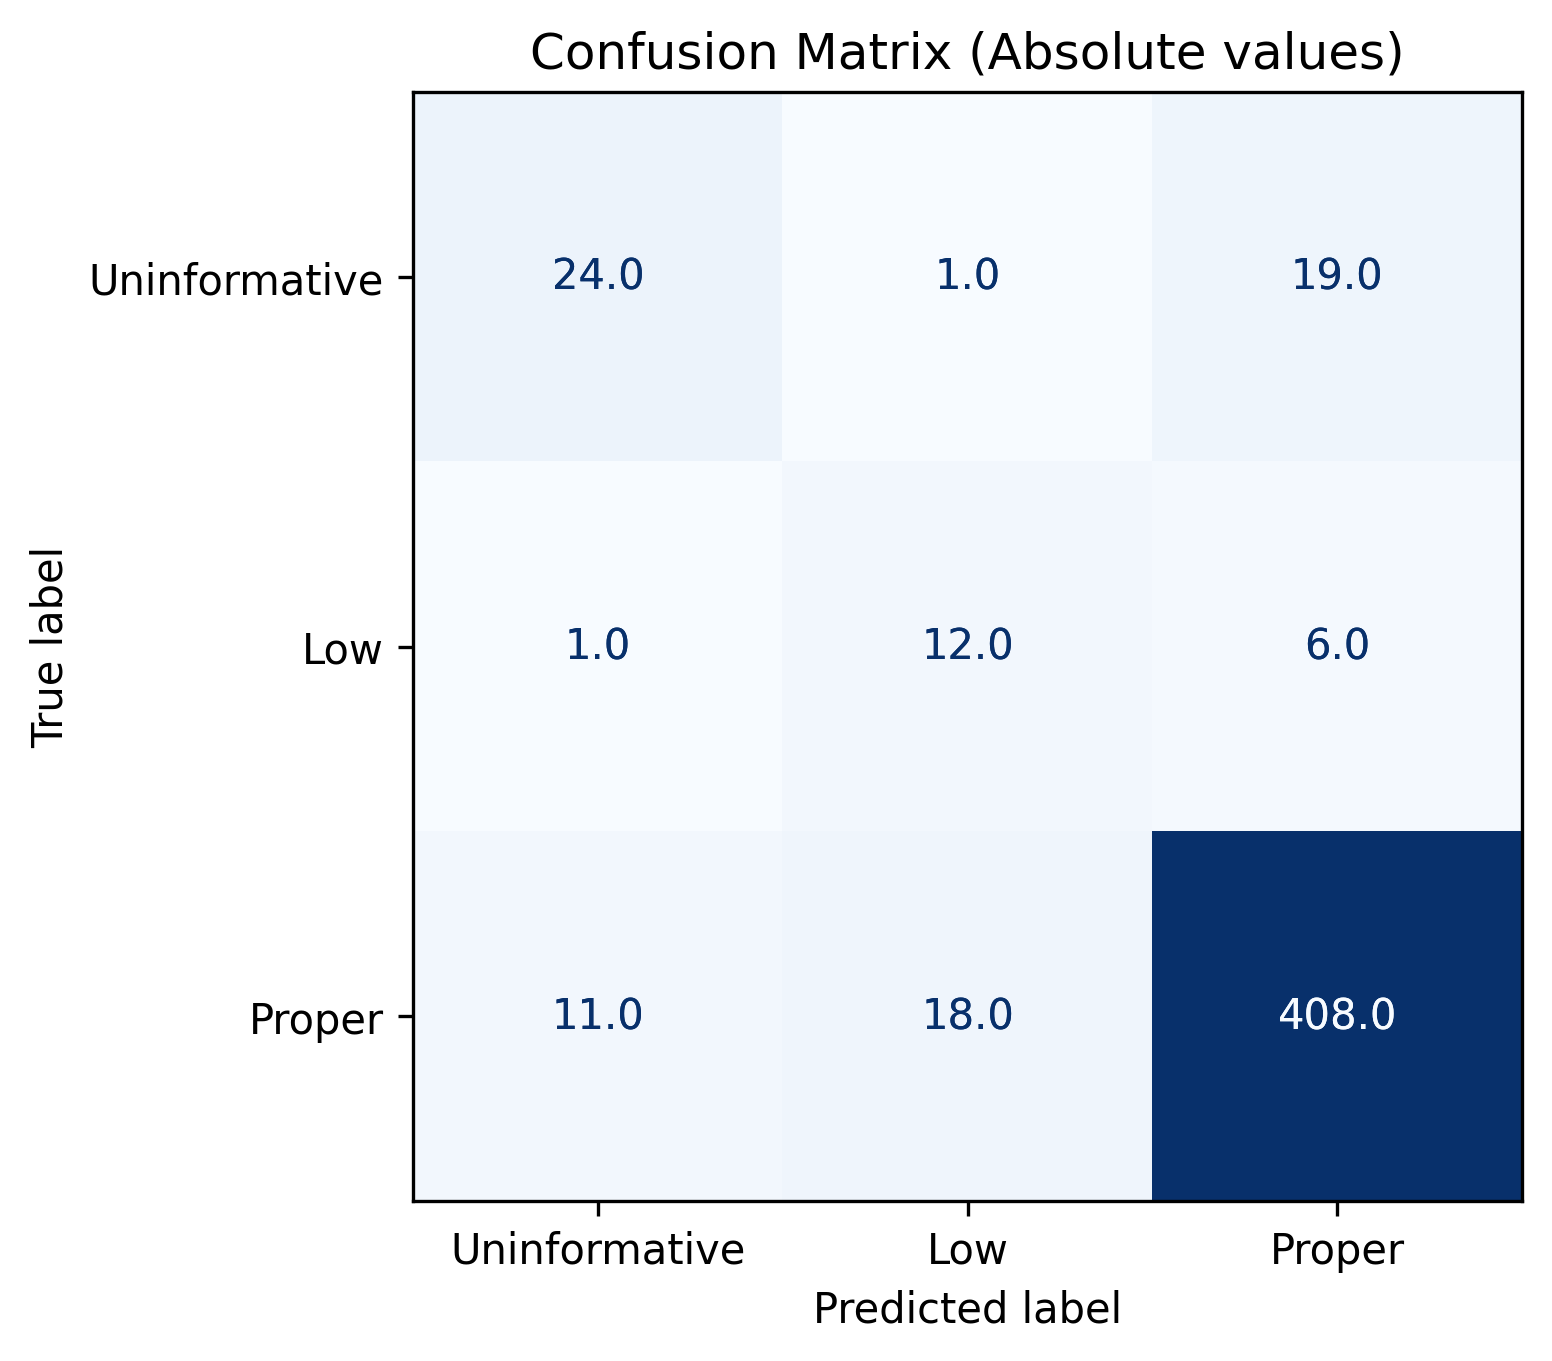
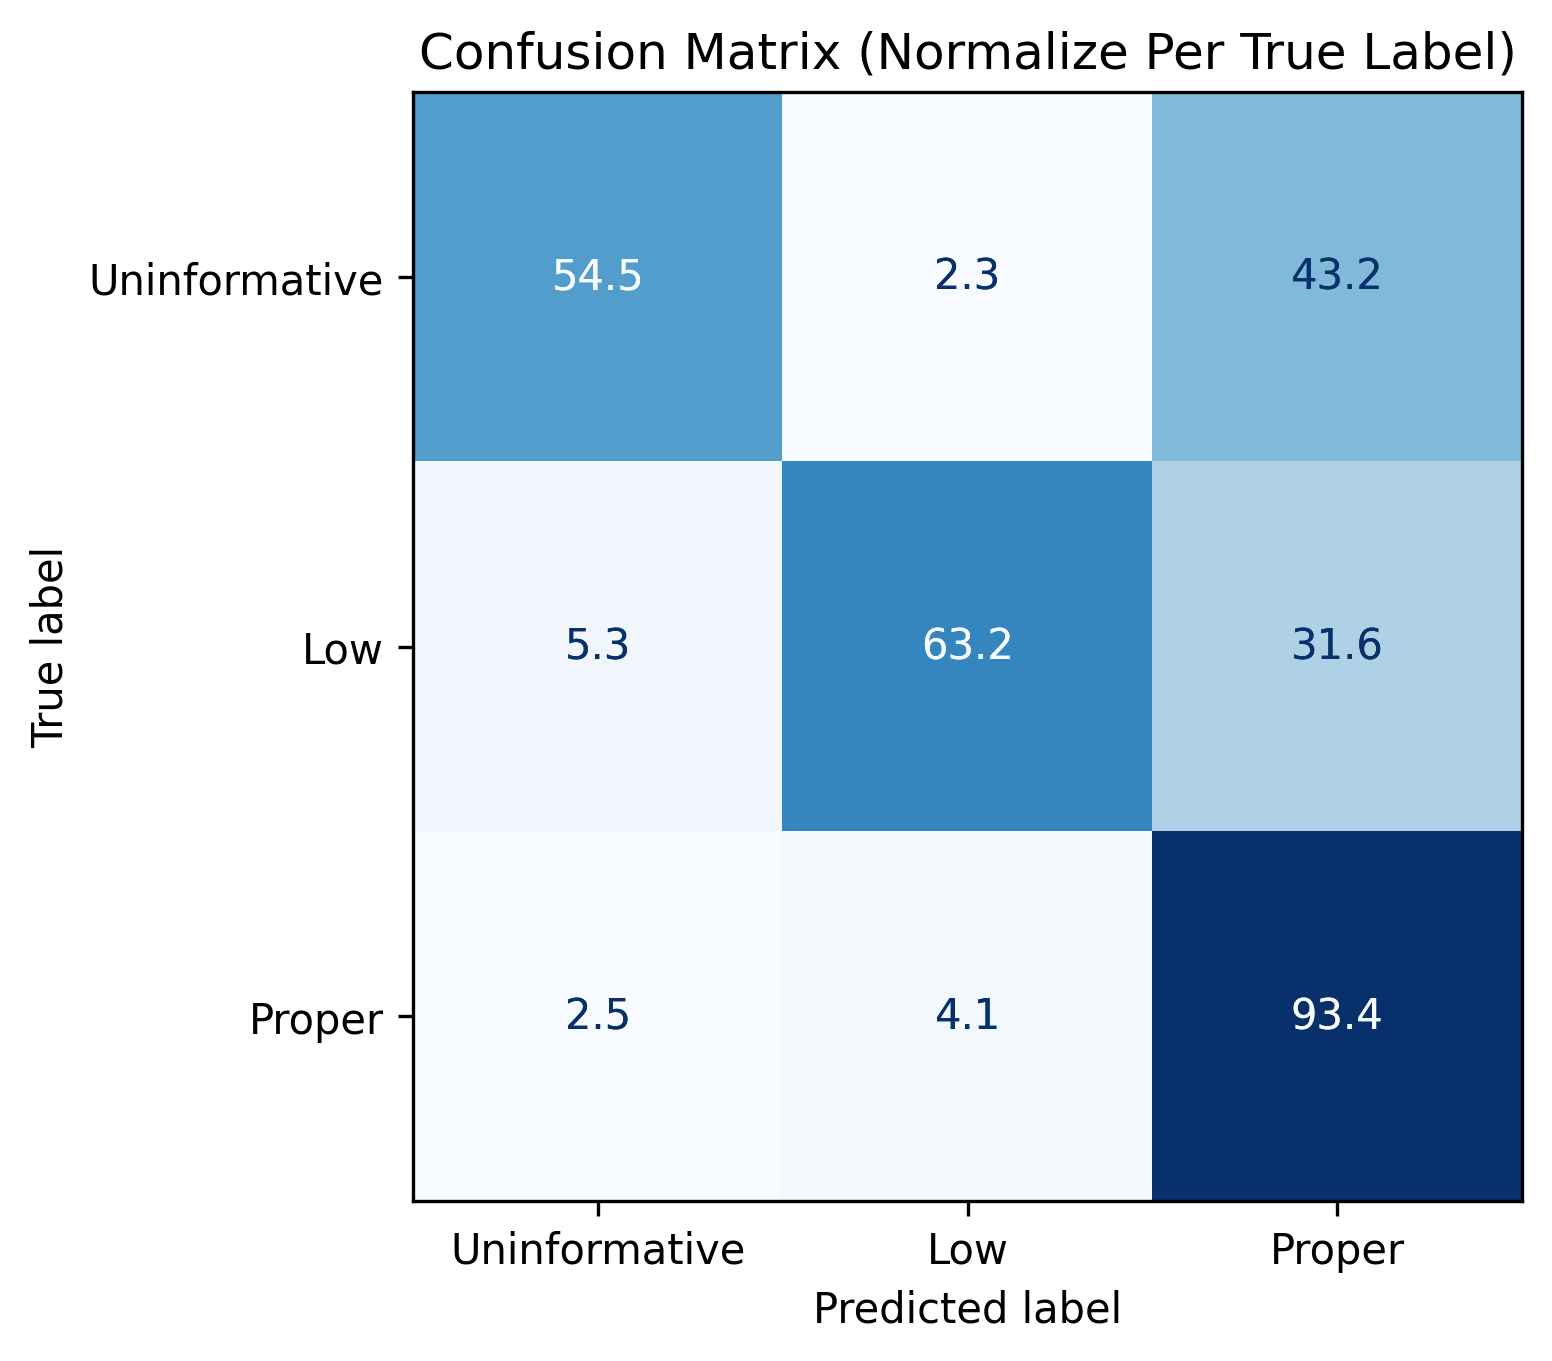

In [6]:
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface
tfidf_wrapper = ModelEvalWrapper(new, "tfidf")
m = ModelEvaluator(tfidf_wrapper, dataloader.get_test())

c_report = m.generate_report()
c_report.show_report()
